# **AP157 Machine Learning Lab Assignment** 
## Module 2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information 

_Full Name (Last Name, First Name)_: Espalmado, Faye\
_Student No._: 2018-11616\
_Section_: WFU-FX

### Submission Information

_Date and Time Submitted (most recent upload)_: June 16, 2021 5PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Faye D. Espalmado** 

### Grading Information (c/o Instructor)

TOTAL SCORE: **100**/100 -- Well done!

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

For this assignment, you will work with galaxy data from the 
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 20190602_195704.jpg   DOCUMENTS  'S2-2021 APPHY157'	 'S2-2021 PHY191-LAB'
'Colab Notebooks'      S1-2021	  'S2-2021 JUNE.gsheet'  'S2-2021 PHY191-LEC'


Define the directory path to the location of the file, i.e. if it is in a 
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/S2-2021 APPHY157/C/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.



In [ ]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [ ]:
import pandas as pd
print(pd.DataFrame(data))

         u-g      g-r      r-i  ...  petroR90_r  petroR90_z   class
0    1.85765  0.67158  0.42310  ...    8.263009   11.477340  merger
1    1.74259  0.86085  0.44927  ...    3.416921    3.330347  merger
2    2.10697  0.96710  0.56810  ...    8.354343   11.265390  merger
3    1.22840  0.60446  0.39049  ...   12.202420   11.826220  merger
4    1.80792  0.78124  0.45528  ...    9.790146    6.636931  merger
..       ...      ...      ...  ...         ...         ...     ...
775  1.34594  0.64285  0.37813  ...   25.266770   25.934250  spiral
776  1.19482  0.49611  0.31017  ...    8.061935    7.840197  spiral
777  1.21489  0.57253  0.35423  ...    9.280005    6.708179  spiral
778  1.41797  0.86460  0.40020  ...    7.738220    7.865478  spiral
779  1.49346  0.86623  0.43432  ...    8.380891    7.720072  spiral

[780 rows x 17 columns]


#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

Here we define the function `generate_features_targets()`. The function returns the features and targets from the given data set. \ The `targets` array contains the data in the "class" column of the data catalogue.  \

The `features` are extracted from the corresponding fields, namely the colors, eccentricity, adaptive moments, and concentration. The concentration is taken by dividing the 50% Petrosian radius measurements by the 90% Petrosian radius measurements.


In [ ]:
def generate_features_targets(data):
  targets = data['class']
  features = np.empty(shape=(len(data), 13))
  
  #colors
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  #eccentricity
  features[:, 4] = data['ecc']
  #ugriz magnitudes
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  # concentration in u filter
  features[:, 10] = data['petroR50_u'] / data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r'] / data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z'] / data['petroR90_z']

  return features, targets


data = np.load(file_path + 'galaxy_catalogue.npy')
features, targets = generate_features_targets(data)

# Print the shape of each array to check the dimensions. 
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

Here we define the function `predict_class()`. This functions splits the data, trains a decision tree classifier and predicts features.\
The function first splits the data set into 80:20 training:testing sets using sklearn's `train_test_split() `function. \
The feature and targets for the training and test sets are then generated using the `generate_features_targets()` function we have defined earlier.\
The decision tree classfier is then initialized using the `DecisionTreeClassifier()`. Training data generated were then used to train the model using `fit()`.\
`predict()` is then used to get predictions for the testing set. 
Finally, it returns the predicted and actual class arrays of the testing set.



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def predict_class(data):
  # split the dataset
  train, test = train_test_split(data,  train_size=0.8, test_size=0.2, random_state=42)

  # generate the feature and targets for the training and test sets
  train_features, train_targets = generate_features_targets(train)
  test_features, test_targets = generate_features_targets(test)

  # train the model
  dtc = DecisionTreeClassifier()
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predictions = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predictions, test_targets

We print out initial results using `predict_class()` for the given data set.

In [ ]:
predicted_class, actual_class = predict_class(data)
for i in np.arange(3):
    print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

0. spiral, spiral
1. spiral, spiral
2. merger, spiral


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

**1.** To evaluate the model, we obtain the array for the confusion matrix using sklearn's `confusion_matrix()` function. A better visualization of the matrix was also constructed using matplotlib. From the matrix, we see that the model correctly predicted 37 spirals, 37 mergers, and 50 elliptical.

[[37 14  1]
 [ 9 37  3]
 [ 0  5 50]]


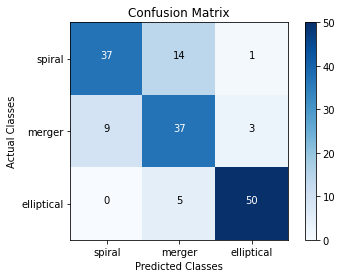

In [ ]:
import itertools
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# obtaining the confusion matrix
class_labels = list(set(actual_class))
cm = confusion_matrix(actual_class, predicted_class, labels=class_labels)
print(cm)

# constructing a confusion matrix plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')

# cm values display 
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, "{}".format(cm[i, j]),horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

**2** We count the total number of correct predictions by finding the values that are equal in both the actual class array and predicted class array. Then this is divided by the total number of the predicted class array to find the accuracy of the model. \
Thus we find that the model has an accuracy of approximately 80%. 

In [ ]:
accuracy = sum(actual_class[:] == predicted_class[:]) / len(predicted_class)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7948717948717948
